In [1]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from datasets import load_from_disk
import json

# Reader 원본 데이터 EDA

In [36]:
dataset = load_from_disk("/opt/ml/input/data/train_dataset")
test_dataset=load_from_disk("/opt/ml/input/data/test_dataset")

In [37]:
train_dataset = dataset["train"]
valid_dataset = dataset["validation"]
test_dataset=test_dataset['validation']

train_df=pd.DataFrame(train_dataset)
valid_df=pd.DataFrame(valid_dataset)
test_df=pd.DataFrame(test_dataset)

In [38]:
train_dataset[0]

{'title': '미국 상원',
 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'id': 'mrc-1-000067',
 'answers': {'answer_start'

In [39]:
valid_dataset[0]

{'title': '전효숙',
 'context': '순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법시험에 합격하여 판사로 임용되었고 대법원 재판연구관, 수원지법 부장판사, 사법연수원 교수, 특허법원 부장판사 등을 거쳐 능력을 인정받았다. 2003년 최종영 대법원장의 지명으로 헌법재판소 재판관을 역임하였다.\\n\\n경제민주화위원회(위원장 장하성이 소액주주들을 대표해 한보철강 부실대출에 책임이 있는 이철수 전 제일은행장 등 임원 4명을 상대로 제기한 손해배상청구소송에서 서울지방법원 민사합의17부는 1998년 7월 24일에 "한보철강에 부실 대출하여 은행에 막대한 손해를 끼친 점이 인정된다"며 "원고가 배상을 청구한 400억원 전액을 은행에 배상하라"고 하면서 부실 경영인에 대한 최초의 배상 판결을 했다. \\n\\n2004년 10월 신행정수도의건설을위한특별조치법 위헌 확인 소송에서 9인의 재판관 중 유일하게 각하 견해를 내었다. 소수의견에서 전효숙 재판관은 다수견해의 문제점을 지적하면서 관습헌법 법리를 부정하였다. 전효숙 재판관은 서울대학교 근대법학교육 백주년 기념관에서 열린 강연에서, 국회가 고도의 정치적인 사안을 정치로 풀기보다는 헌법재판소에 무조건 맡겨서 해결하려는 자세는 헌법재판소에게 부담스럽다며 소회를 밝힌 바 있다.',
 'question': '처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?',
 'id': 'mrc-0-003264',
 'answers': {'answer_start': [284], 'text': ['한보철강']},
 'document_id': 9027,
 '__index_level_0__': 2146}

In [40]:
test_dataset[0]

{'question': "유령'은 어느 행성에서 지구로 왔는가?", 'id': 'mrc-1-000653'}

In [41]:
type(test_dataset)

datasets.arrow_dataset.Dataset

In [42]:
train_df=pd.DataFrame(train_dataset)
train_df['con_len'] = train_df['context'].apply(lambda x: len(x))
train_df['qu_len'] = train_df['question'].apply(lambda x: len(x))
train_df['ans_len']=[len(train_df['answers'][i]['text'][0]) for i in range(len(train_df))]

valid_df=pd.DataFrame(valid_dataset)
valid_df['con_len'] = valid_df['context'].apply(lambda x: len(x))
valid_df['qu_len'] = valid_df['question'].apply(lambda x: len(x))
valid_df['ans_len']=[len(valid_df['answers'][i]['text'][0]) for i in range(len(valid_df))]

test_df=pd.DataFrame(test_dataset)
test_df['qu_len'] = test_df['question'].apply(lambda x: len(x))

In [43]:
train_df.head()

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,ans_len
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,862,32,2
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873,621,22,8
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,850,30,2
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992,727,39,2
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548,609,26,2


In [44]:
valid_df.head()

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,ans_len
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,mrc-0-003264,"{'answer_start': [284], 'text': ['한보철강']}",9027,2146,625,30,4
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,mrc-0-004762,"{'answer_start': [146], 'text': ['1871년']}",51765,3106,964,36,5
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,mrc-1-001810,"{'answer_start': [517], 'text': ['나뭇잎']}",15694,1180,611,31,3
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,mrc-1-000219,"{'answer_start': [1109], 'text': ['금대야']}",59536,141,1391,24,3
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,mrc-1-000285,"{'answer_start': [386], 'text': ['수평적 관계']}",32991,184,608,34,6


In [45]:
test_df.head()

,question,id,qu_len
0,유령'은 어느 행성에서 지구로 왔는가?,mrc-1-000653,21
1,용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?,mrc-1-001113,31
2,돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받았던 인물은?,mrc-0-002191,39
3,"마오리언어와 영어, 뉴질랜드 수화를 공식 언어로 사용하는 나라는?",mrc-0-003951,36
4,디엔비엔푸 전투에서 보응우옌잡이 상대한 국가는?,mrc-1-001272,26


In [46]:
print(f"Train : {len(train_df)}")
print(f"Valid : {len(valid_df)}")
print(f"Test : {len(test_df)}")

Train : 3952
Valid : 240
Test : 600


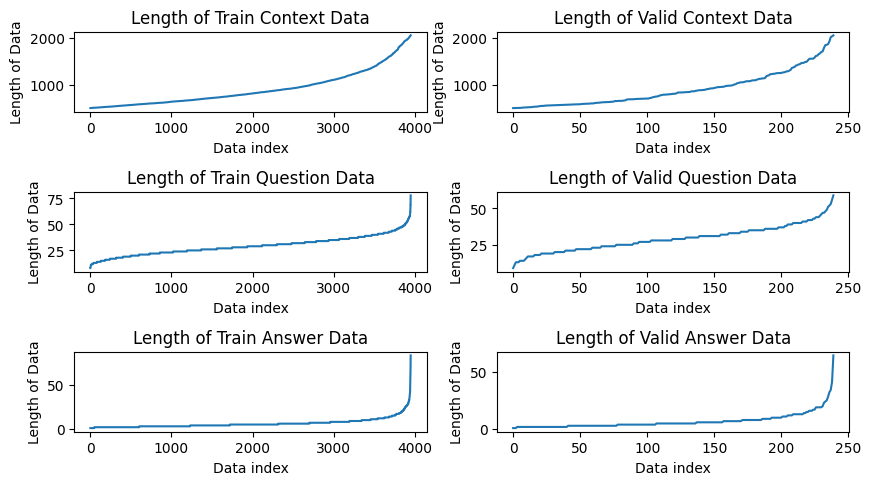

In [47]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1)

plt.subplot(3,2,1)
plt.plot(sorted(train_df["con_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Train Context Data")

plt.subplot(3,2,2)
plt.plot(sorted(valid_df["con_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Valid Context Data")

plt.subplot(3,2,3)
plt.plot(sorted(train_df["qu_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Train Question Data")

plt.subplot(3,2,4)
plt.plot(sorted(valid_df["qu_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Valid Question Data")

plt.subplot(3,2,5)
plt.plot(sorted(train_df["ans_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Train Answer Data")

plt.subplot(3,2,6)
plt.plot(sorted(valid_df["ans_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Valid Answer Data")

plt.show()

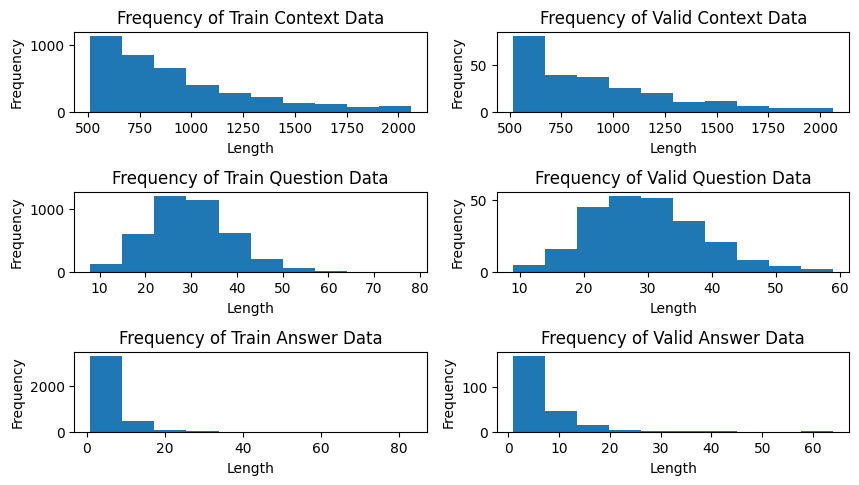

In [48]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1)

plt.subplot(3,2,1)
plt.hist(sorted(train_df["con_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Train Context Data")

plt.subplot(3,2,2)
plt.hist(sorted(valid_df["con_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Valid Context Data")

plt.subplot(3,2,3)
plt.hist(sorted(train_df["qu_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Train Question Data")

plt.subplot(3,2,4)
plt.hist(sorted(valid_df["qu_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Valid Question Data")

plt.subplot(3,2,5)
plt.hist(sorted(train_df["ans_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Train Answer Data")

plt.subplot(3,2,6)
plt.hist(sorted(valid_df["ans_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Valid Answer Data")

plt.show()

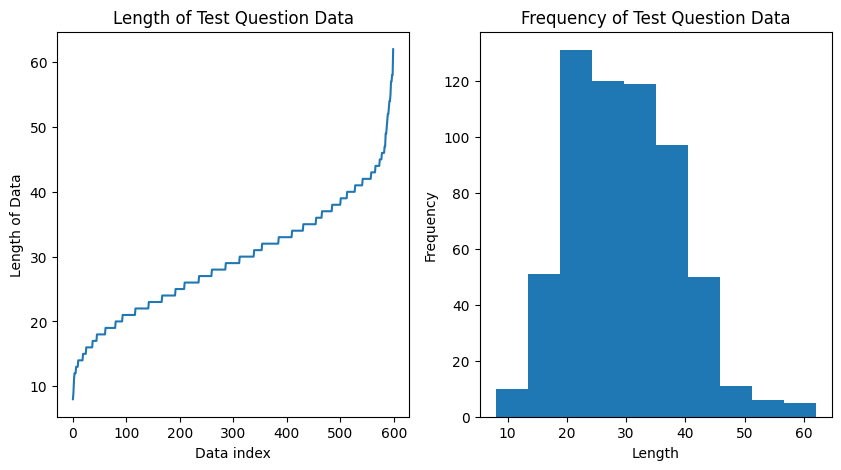

In [49]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.plot(sorted(test_df["qu_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Test Question Data")

plt.subplot(1,2,2)
plt.hist(sorted(test_df["qu_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Test Question Data")

plt.show()

In [50]:
train_df[["con_len","qu_len","ans_len"]].describe()

,con_len,qu_len,ans_len
count,3952.000000,3952.000000,3952.000000
mean,920.220648,29.322368,6.275051
std,356.500514,8.727421,5.346842
min,512.000000,8.000000,1.000000
25%,645.000000,23.000000,3.000000
50%,819.000000,29.000000,5.000000
75%,1099.250000,35.000000,8.000000
max,2059.000000,78.000000,83.000000


In [51]:
valid_df[["con_len","qu_len","ans_len"]].describe()

,con_len,qu_len,ans_len
count,240.000000,240.000000,240.000000
mean,916.725000,29.195833,6.912500
std,360.032122,8.728301,6.858755
min,517.000000,9.000000,1.000000
25%,616.750000,23.000000,3.000000
50%,820.500000,29.000000,5.000000
75%,1107.250000,35.000000,8.000000
max,2064.000000,59.000000,64.000000


In [52]:
test_df.describe()

,qu_len
count,600.000000
mean,29.555000
std,8.962376
min,8.000000
25%,23.000000
50%,29.000000
75%,35.000000
max,62.000000


# Reader 외부 데이터셋 추가 EDA

In [53]:
dataset = load_from_disk("/opt/ml/input/data/data_wiki_korquad")

In [54]:
train_dataset = dataset["train"]
valid_dataset = dataset["validation"]

train_df=pd.DataFrame(train_dataset)
valid_df=pd.DataFrame(valid_dataset)

In [55]:
train_dataset[0]

{'title': '미국 상원',
 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'id': 'mrc-1-000067',
 'answers': {'answer_start'

In [56]:
valid_dataset[0]

{'title': '전효숙',
 'context': '순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법시험에 합격하여 판사로 임용되었고 대법원 재판연구관, 수원지법 부장판사, 사법연수원 교수, 특허법원 부장판사 등을 거쳐 능력을 인정받았다. 2003년 최종영 대법원장의 지명으로 헌법재판소 재판관을 역임하였다.\\n\\n경제민주화위원회(위원장 장하성이 소액주주들을 대표해 한보철강 부실대출에 책임이 있는 이철수 전 제일은행장 등 임원 4명을 상대로 제기한 손해배상청구소송에서 서울지방법원 민사합의17부는 1998년 7월 24일에 "한보철강에 부실 대출하여 은행에 막대한 손해를 끼친 점이 인정된다"며 "원고가 배상을 청구한 400억원 전액을 은행에 배상하라"고 하면서 부실 경영인에 대한 최초의 배상 판결을 했다. \\n\\n2004년 10월 신행정수도의건설을위한특별조치법 위헌 확인 소송에서 9인의 재판관 중 유일하게 각하 견해를 내었다. 소수의견에서 전효숙 재판관은 다수견해의 문제점을 지적하면서 관습헌법 법리를 부정하였다. 전효숙 재판관은 서울대학교 근대법학교육 백주년 기념관에서 열린 강연에서, 국회가 고도의 정치적인 사안을 정치로 풀기보다는 헌법재판소에 무조건 맡겨서 해결하려는 자세는 헌법재판소에게 부담스럽다며 소회를 밝힌 바 있다.',
 'question': '처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?',
 'id': 'mrc-0-003264',
 'answers': {'answer_start': [284], 'text': ['한보철강']},
 'document_id': 9027.0,
 '__index_level_0__': 2146.0}

In [57]:
train_df=pd.DataFrame(train_dataset)
train_df['con_len'] = train_df['context'].apply(lambda x: len(x))
train_df['qu_len'] = train_df['question'].apply(lambda x: len(x))
train_df['ans_len']=[len(train_df['answers'][i]['text'][0]) for i in range(len(train_df))]

valid_df=pd.DataFrame(valid_dataset)
valid_df['con_len'] = valid_df['context'].apply(lambda x: len(x))
valid_df['qu_len'] = valid_df['question'].apply(lambda x: len(x))
valid_df['ans_len']=[len(valid_df['answers'][i]['text'][0]) for i in range(len(valid_df))]

In [58]:
train_df.head()

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,ans_len
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293.0,42.0,862,32,2
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638.0,2873.0,621,22,8
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028.0,230.0,850,30,2
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146.0,992.0,727,39,2
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334.0,548.0,609,26,2


In [59]:
print(f"Train : {len(train_df)}")
print(f"Valid : {len(valid_df)}")

Train : 125435
Valid : 12806


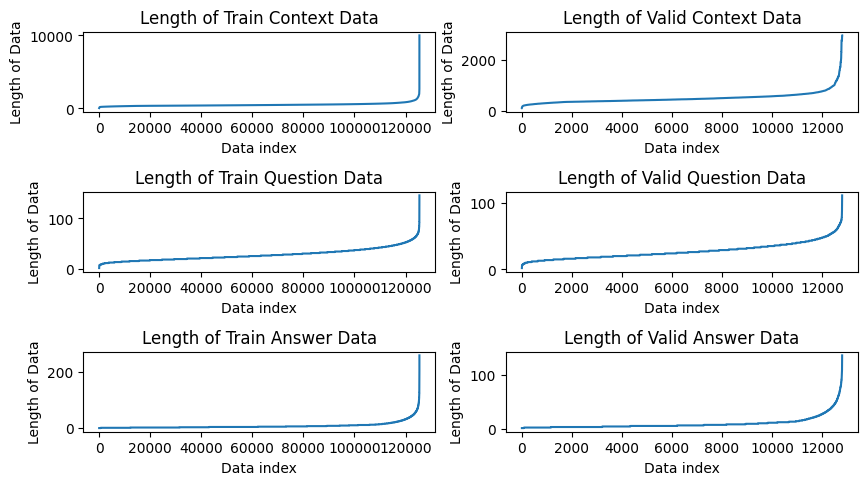

In [60]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1)

plt.subplot(3,2,1)
plt.plot(sorted(train_df["con_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Train Context Data")

plt.subplot(3,2,2)
plt.plot(sorted(valid_df["con_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Valid Context Data")

plt.subplot(3,2,3)
plt.plot(sorted(train_df["qu_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Train Question Data")

plt.subplot(3,2,4)
plt.plot(sorted(valid_df["qu_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Valid Question Data")

plt.subplot(3,2,5)
plt.plot(sorted(train_df["ans_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Train Answer Data")

plt.subplot(3,2,6)
plt.plot(sorted(valid_df["ans_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Valid Answer Data")

plt.show()

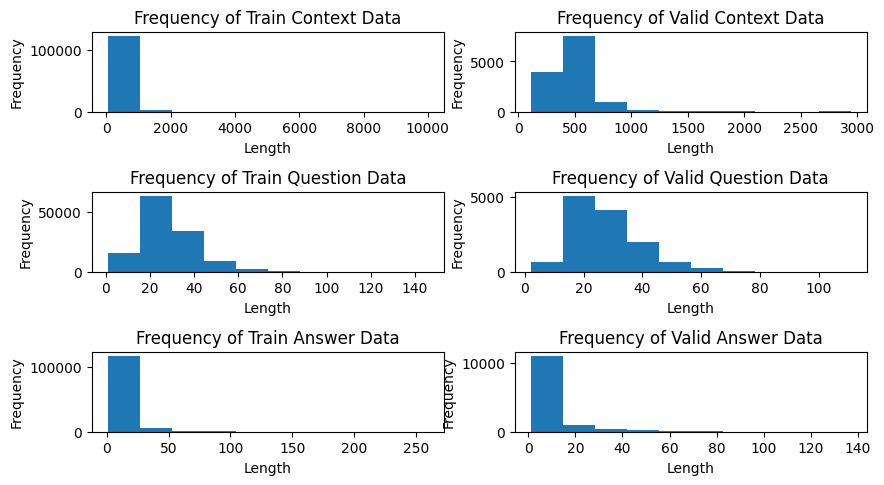

In [61]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1)

plt.subplot(3,2,1)
plt.hist(sorted(train_df["con_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Train Context Data")

plt.subplot(3,2,2)
plt.hist(sorted(valid_df["con_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Valid Context Data")

plt.subplot(3,2,3)
plt.hist(sorted(train_df["qu_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Train Question Data")

plt.subplot(3,2,4)
plt.hist(sorted(valid_df["qu_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Valid Question Data")

plt.subplot(3,2,5)
plt.hist(sorted(train_df["ans_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Train Answer Data")

plt.subplot(3,2,6)
plt.hist(sorted(valid_df["ans_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Valid Answer Data")

plt.show()

In [62]:
train_df[["con_len","qu_len","ans_len"]].describe()

,con_len,qu_len,ans_len
count,125435.000000,125435.000000,125435.000000
mean,495.722278,27.725539,9.083087
std,205.634474,12.027735,11.391437
min,46.000000,1.000000,1.000000
25%,381.000000,19.000000,3.000000
50%,456.000000,25.000000,6.000000
75%,556.000000,34.000000,9.000000
max,10012.000000,146.000000,260.000000


In [63]:
valid_df[["con_len","qu_len","ans_len"]].describe()

,con_len,qu_len,ans_len
count,12806.000000,12806.000000,12806.000000
mean,497.318523,27.291035,9.381306
std,227.467172,11.829500,11.622143
min,110.000000,2.000000,1.000000
25%,379.000000,19.000000,3.000000
50%,451.000000,25.000000,6.000000
75%,554.000000,34.000000,10.000000
max,2946.000000,111.000000,137.000000


# Retrieval 원본 Wiki

In [67]:
path = "/opt/ml/input/data/wikipedia_documents.json"
with open(path, "r") as data_json:
    data_dict = json.load(data_json)

In [68]:
data_dict['0']

{'text': '이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.',
 'corpus_source': '위키피디아',
 'url': 'TODO',
 'domain': None,
 'title': '나라 목록',
 'author': None,
 'html': None,
 'document_id': 0}

In [69]:
for key,value in data_dict["0"].items():
    print(f"{key} : {value}\n")

text : 이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.

이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.

# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.
# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.

두 목록은 모두 가나다 순이다.

일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.

corpus_source : 위키피디아

url : TODO

domain : None

title : 나라 목록

author : None

html : None

document_id : 0



In [70]:
df_wiki=pd.read_json(path).transpose()
df_wiki["text_length"]=[len(wiki["text"]) for wiki in data_dict.values()]

In [71]:
df_wiki.head()

,text,corpus_source,url,domain,title,author,html,document_id,text_length
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0,454
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1,2276
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2,5068
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3,601
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4,465


In [72]:
df_wiki.describe()

,text_length
count,60613.000000
mean,755.565044
std,762.962671
min,184.000000
25%,414.000000
50%,577.000000
75%,857.000000
max,46099.000000


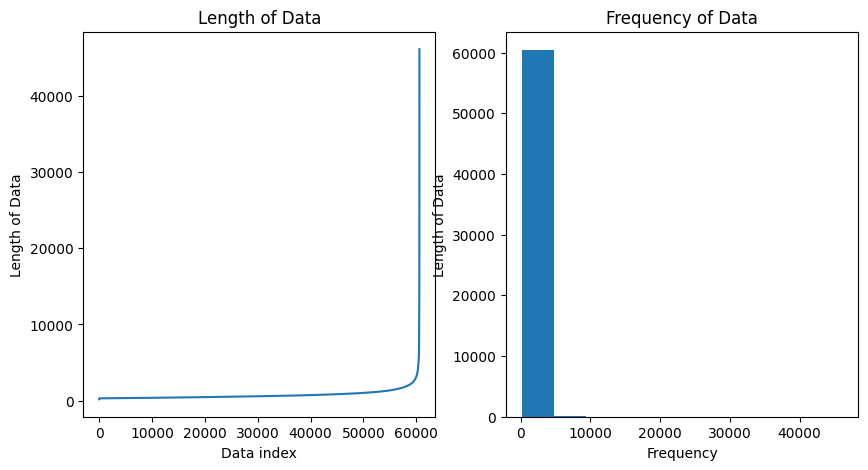

In [73]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.plot(sorted(df_wiki["text_length"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Data")

plt.subplot(1,2,2)
plt.hist(sorted(df_wiki["text_length"]))
plt.xlabel("Frequency")
plt.ylabel("Length of Data")
plt.title("Frequency of Data")

plt.show()

# Retrieval 원본 Wiki + 외부 데이터

In [74]:
path = "/opt/ml/input/data/wiki_korquad_documents.json"
with open(path, "r") as data_json:
    data_dict = json.load(data_json)

In [75]:
df_wiki=pd.read_json(path).transpose()
df_wiki["text_length"]=[len(wiki["text"]) for wiki in data_dict.values()]
df_wiki.head()

,text,corpus_source,url,domain,title,author,html,document_id,text_length
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0,454
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1,2276
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2,5068
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3,601
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4,465


In [76]:
df_wiki.describe()

,text_length
count,170293.000000
mean,584.484312
std,498.357096
min,46.000000
25%,388.000000
50%,477.000000
75%,627.000000
max,46099.000000


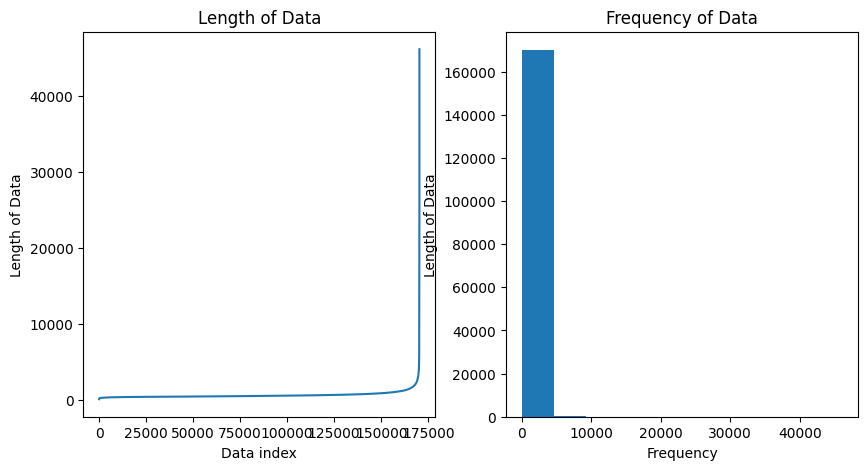

In [77]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.plot(sorted(df_wiki["text_length"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Data")

plt.subplot(1,2,2)
plt.hist(sorted(df_wiki["text_length"]))
plt.xlabel("Frequency")
plt.ylabel("Length of Data")
plt.title("Frequency of Data")

plt.show()

# Pandas Profiling

In [2]:
dataset = load_from_disk("/opt/ml/input/data/train_dataset")
test_dataset=load_from_disk("/opt/ml/input/data/test_dataset")

train_dataset = dataset["train"]
valid_dataset = dataset["validation"]
test_dataset=test_dataset['validation']

train_df=pd.DataFrame(train_dataset)
valid_df=pd.DataFrame(valid_dataset)
test_df=pd.DataFrame(test_dataset)

train_df=pd.DataFrame(train_dataset)
train_df['con_len'] = train_df['context'].apply(lambda x: len(x))
train_df['qu_len'] = train_df['question'].apply(lambda x: len(x))
train_df['ans_len']=[len(train_df['answers'][i]['text'][0]) for i in range(len(train_df))]

valid_df=pd.DataFrame(valid_dataset)
valid_df['con_len'] = valid_df['context'].apply(lambda x: len(x))
valid_df['qu_len'] = valid_df['question'].apply(lambda x: len(x))
valid_df['ans_len']=[len(valid_df['answers'][i]['text'][0]) for i in range(len(valid_df))]

test_df=pd.DataFrame(test_dataset)
test_df['qu_len'] = test_df['question'].apply(lambda x: len(x))

In [3]:
train_pr=train_df.profile_report()
valid_pr=valid_df.profile_report()
test_pr=test_df.profile_report()

train_pr.to_file('train_pr.html')
valid_pr.to_file('valid_pr.html')
test_pr.to_file('test_pr.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/envs/mrc/lib/python3.8/site-packages/multimethod/__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/envs/mrc/lib/python3.8/site-packages/multimethod/__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/envs/mrc/lib/python3.8/site-packages/multimethod/__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
train_pr